## 2. Un problema* Multi-label*

> a) Cargue los datos del *output* del modelo (*labels*), descríbalos ¿Cuántos ejemplos hay por cada clase?

In [3]:
import pandas as pd
import numpy as np
y = pd.read_csv("NUS-WIDE-Lite/NUS-WIDE-Lite_groundtruth/Lite_GT_Train.txt",delimiter="\s",header=None, engine='python').values
y.shape

(27807, 81)

In [2]:
y[100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

Se observa que la representación de los datos son vectores conformados por 0's en su mayoría, donde los 1's podrían corresponder a la presencia de un objeto con etiqueta en la imagen, esta representación permite múltiples etiquetas.

Para saber cuantos ejemplos hay por clase transformamos cada vector a un string equivalente, esto con el objetivo de utilizar la función value_counts() de la clase "Series".

In [2]:
listy = list()
for row in y:
    listy.append(  str( list(row) ).replace(",", "")  )
yseries = pd.Series(listy)

In [5]:
yseries.value_counts()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]    1474
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]     800
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]     271
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]     256
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]     253
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0

Se observa que la mayor cantidad de ejemplos corresponden a imagenes sin elementos etiquetados, también se observa un grupo con solo un 1 lo que puede ser equivalente a que solo aparece una imagen especifica en los 800 ejemplos. La tabla no muestra todo el contenido, pero considerando la gran cantidad de dimensiones existirán muchas combinaciones que solo se repiten 1 vez, de hecho el número distinto de clases es 9421 si consideramos una clase como una combinación de imágenes.

In [4]:
yseries.value_counts().shape

(9421,)

> b) Visualice el tema de que un dato (imagen en este caso) puede tener múltiples etiquetas. Comente sobre la definición del problema multi-label y cómo aplica en este caso.

El problema consiste en que un dato contienen más de una etiqueta las cuáles no son excluyentes entre sí, existen distintos enfoques para tratar el problema multilabel,
* Relevancia Binaria: donde se generan multiples sub tareas de clasificación por bit, o cadenas de decisiones.

* Algoritmos adapatados: algoritmos adapatados para el problema de clasificación como KNN, árboles de decisión, métodos de Kernel y redes neuronales.

* Label Powerset: donde a partir de los datos de entrenamiento se generan clases similares para datos iguales.

En esta sección trabajaremos con algoritmos adaptados de árboles de decisión, Vectores de Soporte, y redes neuronales.

Etiquetas de la imagen : ['animal']


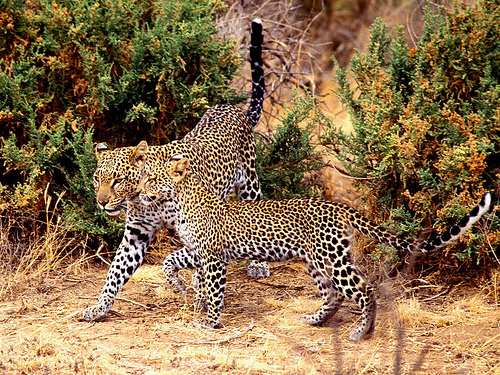

In [4]:
import urllib.request,re
label_names = np.loadtxt("ConceptsList/Concepts81.txt",dtype='object')
arch = open("NUS-WIDE-urls.txt",'r') #lectura para mapeo de link a url
regex = re.compile("\s+")
image2url = {}
for line in arch.readlines():
    aux = regex.split(line.strip())
    image = aux[0].split("Flickr\\")[-1]
    url_m = aux[3]
    image2url[image] = url_m
arch.close()
arch = open("NUS-WIDE-Lite/image list/Train_imageOutPutFileList.txt",'r')
data_urls = [image2url[line.strip()] for line in arch.readlines()]
arch.close()
"""Visualizacion"""
from PIL import Image
s = np.random.randint(0,len(data_urls)) #mostrar para una imagen random
category_sample = np.where(y[s]==1)[0] 
print("Etiquetas de la imagen :",label_names[category_sample])
im = Image.open(urllib.request.urlopen(data_urls[s]))
im


> c) Comente sobre la **representación** que posee la salida de los modelos (*labels*) ¿En qué dominio habita? ¿Tiene restricciones?

Las posibles salidas de los modelos estan acotadas a las mismas 2 elevado a 81 posibles combinaciones de etiquetas que tienen los datos de entrenamiento, es decir como salida para una imagen no clasificada se obtendrá un vector de 0 y 1 como el que se muestra más abajo, cada columna representra la existencia o no de la un objeto en la imagen.
Aún así es muy probable que en una imagen nueva puedan existir objectos no considerados.

> d) Decida sobre una **representación**, en este caso descriptores, para la entrada a los modelos (*input*), puede utilizar la mezcla entre distintos descriptores, comente sobre la elección y qué representa.

Existen 2 formas como nos entregan los datos de entrenamiento, la primera CH es un histograma de colores en 64 dimensiones, donde cada fila representa una imagen, la segunda CM55 es una representación por bloques de momentos de colores, se las imagenes en 225 dimensiones.
Se selecciona CH por que a priorí nos resulta más representativo un histograma para reconocer datos y por que la representación de un dato en una gran cantidad de dimensiones puede generar overfiting.

In [5]:
file = "Normalized_CH_Lite_Train.dat"
descriptors = pd.read_csv("NUS-WIDE-Lite/NUS-WIDE-Lite_features/"+file,delimiter="\s",header=None,engine='python').values
descriptors.shape

(27807, 64)

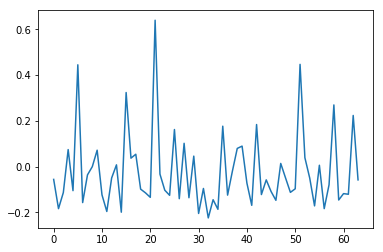

In [49]:
import matplotlib.pyplot as plt
plt.plot(descriptors[s])

Este histograma corresponde a la representación de la misma imagen mostrada anteriorimente, y a continuación su representación en CMM.

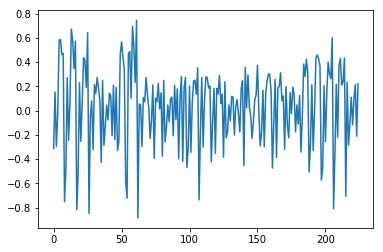

In [50]:
descriptors2 = pd.read_csv("NUS-WIDE-Lite/NUS-WIDE-Lite_features/Normalized_CM55_Lite_Train.dat",delimiter="\s",header=None,engine='python').values
plt.plot(descriptors2[s])

> e) Deje un conjunto separado para evaluar los modelos y comportar como conjunto de pruebas, además de realizar la clásica estandarización de las entradas de los modelos.

Se realiza la división del conjunto de entrenamiento y prueba, considerando un 1/3 para pruebas.

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(descriptors,y,test_size=0.33)
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

> f) Se presenta una métrica para validar en el código a continuación, la cual mide la cantidad de aciertos a las labels que tenga un dato de manera normalizada. Defina otra métrica a utilizar con el propósito de validar lo mismo (el desempeño de un modelo).

Definimos una métrica propia  basada en el error cuadrático medio para calcular la precisión de una predicción, se restan los vectores reales con los predecidos, obteniendo vectores como el siguiente (0,0,1,0,-1,0,-1,0,...), los valores positivos indican que había una imagen y no fue considerada y los valores -1 indican que no había una imagen y fue predecida. 

La precisión se calculará como :  total_imagenes - errores / total_imagenes.

La variable "errores" equivale a la cantidad -1 y 1 del vector resta, por lo que se calcula el cuadrado de la resta transformando -1's en 1's.

Como la cantidad de -1 puede superar la cantidad de imagenes originales, es decir en un caso pesimista, se pueden predecir 81 imagenes y en realidad no había ninguna, se suman este tipo de errores al total de imagenes originales, por lo que para el caso pesimista se calculará la precisión como (81-81)/81 = 0%

Tambien redifinimos la métrica por defecto ya que no consideradaba el caso de la división por 0, en el caso de imagenes donde no aparecen ninguna de las 81 etiquetas.

In [7]:
def evaluation_metric(y_true,y_pred):
    suma = 0.
    for y,yp in zip(y_true,y_pred):
        if np.sum(y) != 0:
            suma += np.dot(y,yp) / np.sum(y)  #cantidad de valores iguales
    return suma/float(len(y_true))

import math
def distancia(y_true, y_pred):
    suma = 0.
    for y1,y2 in zip(y_true,y_pred):        
        resta = sum((y1-y2) == -1)
        total = sum(y1) + resta
        if total != 0:
            errores = sum((y1-y2)*(y1-y2))
            precision = (total-errores)/total        
            suma += precision
            
    return suma/float(len(y_true))
    

> g) Experimente en resolver el problema con un Árbol de Decisión (varíando los hiper-parámetros estructurales), el cual a través de sklearn se puede extender de manera sencilla a multi-label [4]. Mida las métricas de desempeño definidas anteriormente sobre ambos conjuntos (entrenamiento y pruebas), comente.


No se limita la máxima profundidad en los parámetros, ya que se podría encontrar una división óptima al dividir una hoja en dos hojas, entre todas las soluciones que considera el árbol. Se considera la entropía como una buena función objetivo de distancia entre puntos para los árboles de decisión, aunque "gini" genera resultados similares en la práctica. Finalmente el comprobamos que los resultados no varían para el parámetro "splitter".

In [8]:
from sklearn.tree import DecisionTreeClassifier as Tree
model = Tree() 
model.set_params(max_depth=None,criterion='entropy',splitter='best')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)


In [9]:
evaluation_metric(y_test,y_pred)

0.34568041048099923

In [10]:
distancia(y_test, y_pred)

0.23023463799043448

> h) Experimente en resolver el problema con una Máquina de Soporte Vectorial no lineal (varíando los hiper-parámetros estructurales), el cual a través de sklearn se puede extender a multi-label a través de la técnica OneVsRest. Mida las métricas de desempeño al igual que para el Árbol de Decisión, comente y compare sobre las métricas y los tiempos de ejecución.

El valor del parámetro de regularización C restringe o aumenta la cantidad de puntos que son considerados como super vectors, un valor pequeño ignora un gran conjunto de datos, y un valor alto considera una gran cantidad de datos para estimar la frontera. 
Por lo tanto el valor óptimo de C depende de los mismos datos de entrenamiento, por lo que se probarón potencias de 10 en -2, -1, 0, 1, 2 y 3 para encontrar el óptimo.

In [8]:
from sklearn.svm import SVC as SVM #SVC is for classification
from sklearn.multiclass import OneVsRestClassifier
model= SVM()
model.set_params(C=1000,kernel='rbf')
meta_model = OneVsRestClassifier(model)
meta_model.fit(X_train,y_train)
y_pred = meta_model.predict(X_test)

In [9]:
evaluation_metric(y_test,y_pred)

0.3699253542094343

In [10]:
distancia(y_test, y_pred)

0.26481745601147166

Dada la complejidad computacional para ejecutar cada uno de los modelos para distintos valores de C no resulta viable graficar la métrica de evaluación en función de C, no obstante se ha seleccionado el valor de C que entrega mejores resultados, y se muestran los valores C obtenidos en las pruebas individuales: 

* C = 0.01, evaluation metric = 0.267 distancia = 0.243
* C = 0.1,  evaluation metric = 0.280 distancia = 0.264
* C = 1,    evaluation metric = 0.296 distancia = 0.276
* C = 10,   evaluation metric = 0.315 distancia = 0.286
* C = 100,  evaluation metric = 0.337 distancia = 0.282
* C = 1000,  evaluation metric = 0.370 distancia = 0.265

Los resultados son similares a los encontrados usando árboles de decisión, por lo que para este ejemplo no existen mejoras significativas entre ambos métodos, incluo SVM tiene la desventaje que se debe encontrar un valor apropiado para el hiperparámetro C, lo que resulta costoso en terminos computacionales. Como resultado final encontramos C=1000 encuentra los mejores resultados para la primera métrica de evaluación, no obstante la métrica de distancia definida empieza a bajar, la segunda métrica resulta más valiosa puesto que la primera métrica solo cosidera los aciertos, es decir cuando ambas etiquetas son 1, la segunda métrica penaliza los errores, es decir cuando la misma etiqueta tiene 1 y 0 ó 0 y 1. 

Por lo tanto el valor ideal de C debe estar entre el intervalo 100 - 1000. donde la primera métrica sube mucho y la segunda baja muy poco.

> i) Experimente en resolver el problema con una Red Neuronal Feed Forward (decida el número de capas y el número de neuronas, si desea puede utilizar las por defecto). Éste modelo se extiende a multi-label a través de la interfaz de keras seleccionando una loss adecuada, en este caso binary cross entropy ¿Por qué?

Cross entropy es útil en el problema multilabel ya que se basa en obtener como respuesta una distribuion de probabilidad para las distintas etiquetas considerando la probabilidades individuales de cada una de esas etiqutas en el conjunto de entrenamiento.

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(y_train.shape[1], activation="sigmoid"))
model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy")
model.fit(X_train, y_train, epochs=40, batch_size=128, verbose=1)

C:\Users\Kristian\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/40
18630/18630 [==============================] - 3s 167us/step - loss: 0.4832
Epoch 2/40
18630/18630 [==============================] - 0s 25us/step - loss: 0.1886
Epoch 3/40
18630/18630 [==============================] - 0s 25us/step - loss: 0.1563
Epoch 4/40
18630/18630 [==============================] - 0s 24us/step - loss: 0.1495
Epoch 5/40
18630/18630 [==============================] - 0s 25us/step - loss: 0.1462
Epoch 6/40
18630/18630 [==============================] - 0s 24us/step - loss: 0.1441
Epoch 7/40
18630/18630 [==============================] - 0s 24us/step - loss: 0.1425
Epoch 8/40
18630/18630 [==============================] - 0s 24us/step - loss: 0.1412
Epoch 9/40
18630/18630 [==============================] - 0s 24us/step - loss: 0.1401
Epoch 10/40
18630/18630 [==============================] - 0s 24us/step - loss: 0.1392
Epoch 11/40
18630/18630 [==============================] - 0s 25us/step - loss: 0.1384
Epoch 12/40
18630/18630 [==========================

> j) Realice predicciones probabilísticas de su modelo ¿Las probabilidades están normalizadas? ¿Por qué? Además defina una forma para pasar de la representación de las probabilidades a la representación de labels categoricos definidos como en c).
Hint: Recuerde que el no pertenecer a ninguna label/etiqueta es una posibilidad!!

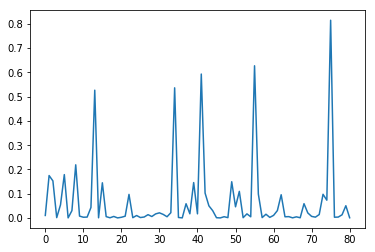

In [17]:
prob_pred = model.predict(X_test) 
plt.plot(prob_pred[0])

La representación anterior muestra la distribución de probabilidade de pertenecer a cada una de las 81 etiquetas (solo la primera imagen), como se observa existen puntos que tienen una alta probabilidad, lo que indica que la etiqueta puede estar presente, los resultados ya estan normalizados, ya que se la entropía cruzada considera las probabiliades individuales de cada etiqueta, las cúales tienen como máximo el valor 1.

Para redeifinir este resultados en términos de un vector de 1's y 0's realizamos una transformación simple que considera el valor 0.5 como el tope para los 0´s y desde 0.5 hasta 1 como valor 1.

In [42]:
def transform(prob_pred):    
    l = list()
    for prob in prob_pred:
        prob= pd.Series(list(prob_pred[0])) #  transforma a series para poder usar apply
        prob = np.array(prob.apply(round))  # redondea y lo guardad como array
        l.append(prob)
    
    return np.array(l)        

In [43]:
y_pred = transform (prob_pred)

In [47]:
evaluation_metric(y_test,y_pred)

0.4215530709891639

In [48]:
distancia(y_test, y_pred)

0.28862836369373823

Los resultados obtenidos son mucho mejores que en las técnicas anteriores, la primera métrica demuestra que existió un gran número de aciertos y entre etiquetas, pero la segunda dice que las etiquetas no reconocidas y mal reconocidas son tan malas como las técnicas anteriores.

## 4. Entendimiento de imágenes de personas

> a) Cargue los datos dos dataset de entrenamiento y de pruebas ¿Cuántos datos hay en cada conjunto?

A partir del documento descriptor de los metadatos se sabe que el conjunto de entrenamiento "eventrain.mat" contiene 3500 imagenes representadas con descriptores, mientras que el conjunto de pruebas "eventest.mat" contiene 1050 caras.

In [2]:
import scipy.io as sio
mat_train = sio.loadmat("./AgeGenderClassification/eventrain.mat")
mat_test = sio.loadmat("./AgeGenderClassification/eventest.mat")
data_train= mat_train["trcoll"][0][0]
data_test= mat_test["tecoll"][0][0]

In [21]:
data_train[0].shape, data_test[0].shape

((3500, 14), (1050, 14))

> b) Elija cuál representación utilizará para trabajar los datos y entregárselos como *input* al modelo de aprendizaje a utilizar, recuerde que puede utilizar una combinación de éstos si lo desea. Además extraiga las salidas/*output* del problema, en este caso, como ya se comentó, la edad. Describa los datos utilizados y la cantidad de datos por rango de edad.

Para trabajar seleccionamos el ffcoefs ya que tiene una representación de cada imgaen en un espacio propio, por lo que las dimensiones estan relacionas para describir la imagen, lo que no ocurre en genFeat donde existen características que son metadatos de la imagen y pueden no ser útiles para reconocer la edad de una cara.

Tambien notamos que genFeat contiene información relativa a otras imagenes vecinas como el tamaño, lo que podría resultar valioso si lo que se quiere determinar es el género, pero en este caso es la edad.

In [42]:
ffcoefs = data_train[3]   #it can be used as representation: fisherface space
ageClass = data_train[1] #target

In [43]:
ffcoefs.shape

(3500, 37)

A continuación se describen y visualizan los datos con los que elegimos trabajar

In [44]:
import pandas as pd
import numpy as np
pd.DataFrame(ffcoefs).describe()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,...,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,-0.002016,-0.010114,0.006056,-0.002659,-0.014820,0.001444,-0.008208,-0.001599,0.007751,-0.003352,...,-0.003775,-0.000285,-0.006235,-0.004968,-0.003826,-0.007218,-0.000199,0.000842,0.008782,0.002394
std,0.044807,0.043650,0.041023,0.035032,0.043308,0.035311,0.039498,0.033685,0.032359,0.032753,...,0.030227,0.030065,0.029977,0.027988,0.029712,0.026428,0.027097,0.026621,0.027672,0.026687
min,-0.223321,-0.199689,-0.176465,-0.166163,-0.246679,-0.186071,-0.235071,-0.141540,-0.169273,-0.156871,...,-0.127200,-0.137077,-0.125549,-0.135406,-0.154989,-0.119856,-0.128302,-0.110191,-0.110497,-0.109979
25%,-0.024813,-0.037819,-0.020128,-0.024298,-0.038274,-0.019398,-0.027378,-0.022117,-0.010567,-0.023558,...,-0.022115,-0.019017,-0.025255,-0.021200,-0.021341,-0.024575,-0.016881,-0.015854,-0.007646,-0.012870
50%,0.005811,-0.011525,0.004161,-0.000200,-0.010231,0.004458,-0.003890,-0.001389,0.007384,-0.002598,...,-0.004239,0.000011,-0.007027,-0.005025,-0.003674,-0.007075,-0.000126,-0.000363,0.008284,0.003225
75%,0.027421,0.017315,0.030025,0.019734,0.012546,0.023700,0.015695,0.019276,0.025947,0.017696,...,0.014789,0.018936,0.011832,0.011471,0.014349,0.008996,0.016192,0.016821,0.024867,0.018240
max,0.164244,0.233903,0.210370,0.154831,0.191513,0.183332,0.206184,0.139622,0.182040,0.153016,...,0.130934,0.137887,0.103279,0.140450,0.134933,0.121894,0.132893,0.114173,0.152421,0.174398


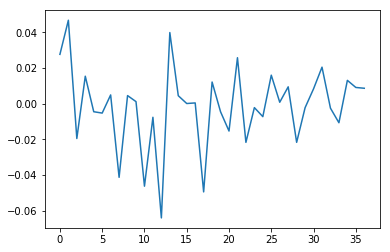

In [46]:
import matplotlib.pyplot as plt
plt.plot(ffcoefs[3])

Se observa que la representación en este espacio esta limitado, los valores máximos para todas las dimensiones solo alcanza 0.23 y el mínimo -0.246 lo que resulta postivo al no encontrar valores outliers, pero pudiendo tener implicaciones negativas en el entrenamiento de algún modelo por considera valores negativos.

(array([1000.,  500.,  500.,  500.,    0.,    0.,  500.,    0.,    0.,
         500.]),
 array([ 1. ,  8.4, 15.8, 23.2, 30.6, 38. , 45.4, 52.8, 60.2, 67.6, 75. ]),
 <a list of 10 Patch objects>)

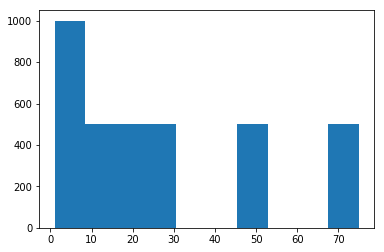

In [49]:
plt.hist(ageClass)

In [57]:
pd.Series(list(ageClass)).value_counts()

[51]    500
[10]    500
[16]    500
[5]     500
[75]    500
[1]     500
[28]    500
dtype: int64

Se observa que las salidas en el entrenamiento estan distribuidas equitativamente en cada clase, con 500 datos cada categoría y la mayoría de las imganes estan concentradas en desde 1 a los 28.

> c) Defina y entrene modelos de aprendizaje para la inferencia de la edad de la persona a través de la representación escogida, *se espera que experimente con distintas configuraciones, modelos e hiper-parámetros* . Intente llegar a un *MSE* menor a 100 sobre la edad de las personas en el conjunto de pruebas. Recuerde que **NO** puede seleccionar modelos a través del conjunto de pruebas. Visualice sus resultados si estima conveniente.

Primero extraemos los conjuntos de entrenamiento y pruebas, y los dejamos preparados para el entrenamiento estandarizando los datos.

In [137]:
X_train = ffcoefs
y_train = ageClass
X_test = data_test[3]
y_test = data_test[1]
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

Utilizando un árbol de decisión se obtienen los siguientes resultados:

In [74]:
from sklearn.tree import DecisionTreeClassifier as Tree
model = Tree() 
model.set_params(max_depth=None,criterion='entropy',splitter='best')
model.fit(X_train,y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [75]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_pred_train), mean_squared_error(y_test,y_pred_test)

(0.009428571428571429, 71.64857142857143)

Los resultados obtenidos son muy buenos para árboles de decision, tanto para el conjunto de entrenamiento donde son casi iguales, como el conjunto de pruebas. Comprobamos estos resultados a continuación.

In [79]:
suma = 0
for y1,y2 in zip(y_train, y_pred_train): 
    if y1==y2:
        suma+=1
suma

3498

A continuación se probarán los resultados utilizando SVM con One vs Rest, similar al problema 2 ya que se trata de un problemas de clasificación con múltiples clases.

In [87]:
from sklearn.svm import SVC as SVM #SVC is for classification
from sklearn.multiclass import OneVsRestClassifier
model= SVM()
model.set_params(C=10000,kernel='rbf')
meta_model = OneVsRestClassifier(model)
meta_model.fit(X_train,y_train)

y_pred_train = meta_model.predict(X_train)
y_pred_test = meta_model.predict(X_test)

mean_squared_error(y_train, y_pred_train), mean_squared_error(y_test,y_pred_test)

(0.009428571428571429, 55.79142857142857)

Se obtienen los siguientes resultados cuando varía C:
* C = 0.01   train = 17.09  test = 56.77
* C = 0.1    train = 16.53  test = 57.07
* C = 1      train = 10.34  test = 54.49
* C = 10     train = 1.59   test = 52.74
* C = 100    train = 0.0094 test = 56.55
* C = 1000   train = 0.0094 test = 55.79
* C = 10000  train = 0.0094 test = 55.79

Los resultados no mejoran despúes de C = 1000 ya que se consideran todos los puntos, los resultados para el conjunto de prueba alcanza su mejor valore en C = 10 y son mejores que los resultados para árboles de decisión.

>Para problemas de clasificación de múltiples clases, la red neuronal de keras necesita una represnetacion one hot vector similar a lo comentado en la sección 2, por lo que será necesario transformar/codificar las edades a etiquetas categóricas, donde cada columna del vector representará una categoría. Por ejemplo, si existen tres categorías (perro, gato, ratón), la categoría perro puede ser codificada como [1,0,0], y la categoría ratón puede ser codificada como [0,0,1]. Para ésto la librería keras nos ayuda:

In [138]:
import keras
y_onehot = keras.utils.to_categorical(y_train_str, num_classes=76)
y_onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [139]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(y_onehot.shape[1], activation="sigmoid"))
model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy")
model.fit(X_train, y_onehot, epochs=40, batch_size=128, verbose=1)

Epoch 1/40
3500/3500 [==============================] - 0s 94us/step - loss: 0.6579
Epoch 2/40
3500/3500 [==============================] - 0s 31us/step - loss: 0.5626
Epoch 3/40
3500/3500 [==============================] - 0s 31us/step - loss: 0.4359
Epoch 4/40
3500/3500 [==============================] - 0s 31us/step - loss: 0.3012
Epoch 5/40
3500/3500 [==============================] - 0s 31us/step - loss: 0.1998
Epoch 6/40
3500/3500 [==============================] - 0s 36us/step - loss: 0.1399
Epoch 7/40
3500/3500 [==============================] - 0s 36us/step - loss: 0.1066
Epoch 8/40
3500/3500 [==============================] - 0s 45us/step - loss: 0.0874
Epoch 9/40
3500/3500 [==============================] - 0s 40us/step - loss: 0.0754
Epoch 10/40
3500/3500 [==============================] - 0s 36us/step - loss: 0.0675
Epoch 11/40
3500/3500 [==============================] - 0s 31us/step - loss: 0.0619
Epoch 12/40
3500/3500 [==============================] - 0s 45us/step - lo

In [140]:
prob_train = model.predict(X_train) 
prob_test = model.predict(X_test) 

In [141]:
pd.DataFrame(prob_train).describe

<bound method NDFrame.describe of             0         1         2         3         4         5         6   \
0     0.005947  0.196343  0.004792  0.005127  0.003986  0.151371  0.003571   
1     0.005931  0.193411  0.005883  0.003817  0.004529  0.160452  0.005204   
2     0.002676  0.096924  0.001463  0.001225  0.001309  0.137895  0.002283   
3     0.005683  0.173745  0.005485  0.002754  0.005051  0.151078  0.003785   
4     0.007147  0.239166  0.008501  0.004419  0.005569  0.210746  0.007890   
5     0.003098  0.140069  0.003905  0.002727  0.002179  0.208434  0.004194   
6     0.003752  0.239584  0.003351  0.002716  0.004671  0.150514  0.004962   
7     0.003129  0.336740  0.005755  0.002319  0.005320  0.212409  0.003916   
8     0.008528  0.194044  0.008891  0.007436  0.009077  0.153047  0.009274   
9     0.002945  0.188301  0.005290  0.003020  0.004184  0.173410  0.004397   
10    0.000849  0.073818  0.000539  0.000538  0.000937  0.148128  0.001579   
11    0.001984  0.127716  0.00

Como los resultados son distribuciones de probabilidades, elegimos la posición de la probabilidad que tenga el valor máximo, esa posición determinará la edad de predicción.

In [142]:
def transform(prob_pred):    
    l = list()
    for prob in prob_pred:
        prob= pd.Series(list(prob_pred[0])) #  transforma a series para poder usar apply
        a = prob
        a = np.array(a)
        indice_max = int(np.where(a==max(a))[0]) # Obtiene la posición donde la probabilidad es máxima
        l.append(indice_max)       
    return np.array(l) 

y_pred_train = transform(prob_train)
y_pred_test = transform(prob_test)

In [143]:
mean_squared_error(y_train, y_pred_train), mean_squared_error(y_test,y_pred_test)

(2981.0, 1101.0)

Los resultados para este caso son muy alejados de la realidad, esto ocurre por varias razones, la primera es que la representación de los datos de edades a vectores de números genera 75 dimensiones distintas para las edades, de lo contrario algunas edades quedan fuera de rango, esto genera vectores muy grandes con muchos ceros que no apoyan el entrenamiento.

Lo segundo es que el uso de esta red neuronal es poco útil en este caso, ya que trabajamos con un problema de clasificación de una sola etiqueta y no de múltiples, y los resultados entregados son distribuciones de probabilidades por lo que existen probabilidad que una imagen pertenezca a varias edades, lo cúal no tiene mucho sentido para el problema en que queremos encontrar la etiqueta específica.

# Conclusiones
Como conclusiones finales hemos  encontrado que tanto los árboles de decisión como los super vectors son buenas estrategias para reconocer imagenes, los resultados tan bajos de MSE se pueden explicar por que se selecciono la mejor representación de las imagenes que era una representación autocontenida y no dependia de las imganes vecinas, sino que describia la imagene en un espacio distinto, no obstante fue necesaria la estandarización para encontrar buenos resultados.

Árboles de decisión resulto valioso pues la respuesta es única, es decir una única hoja o región que representaba cada edad.
Otro punto común que ayudo fueron las categorías limitadas de edades, solo 7, en un problema real las edades estan más distribuidas y resulta difícil el entrenamiento.

En el caso de los Super vectors se fue generando fronteras que diferenciaban cada clase, las representaciones de las imagenes ayudó en este caso y tambien la correcta identificación del hiperparámetro, lo cuál fue un proceso más rápido que en el ejericicio 2 el cúal exigió más tiempo computacional por el número de ejemplos.